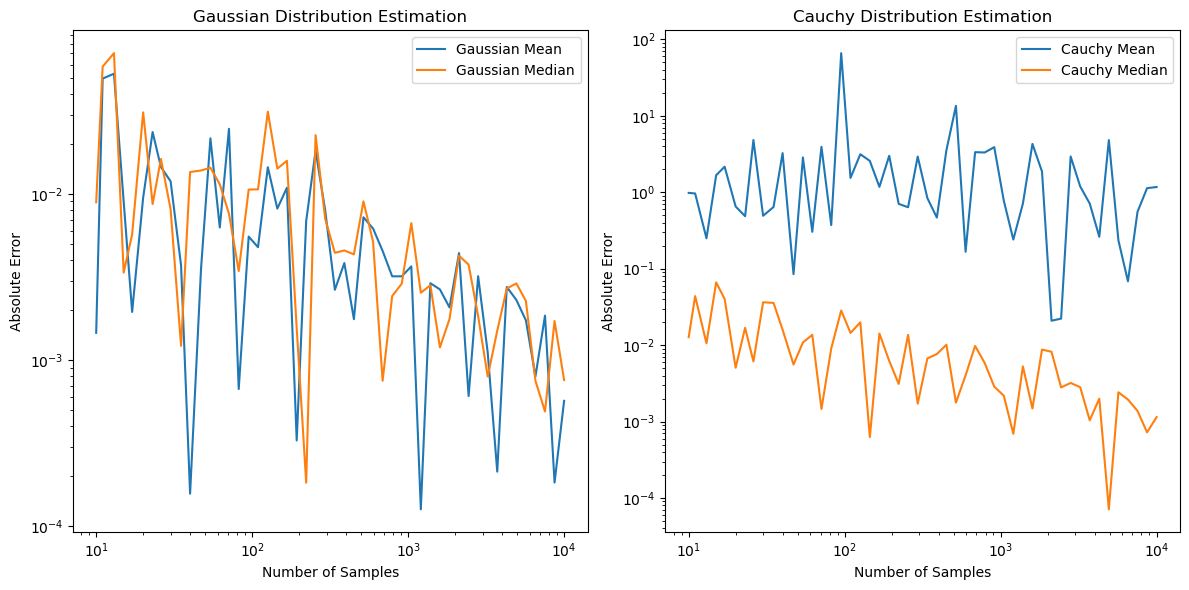

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def generate_and_estimate_samples(dist_func, n_samples_list, num_trials=100):
    means = []
    medians = []
    
    for n in n_samples_list:
        trial_means = []
        trial_medians = []
        for _ in range(num_trials):
            samples = dist_func(n)
            trial_means.append(np.mean(samples))
            trial_medians.append(np.median(samples))
        
        means.append(np.mean(trial_means))
        medians.append(np.mean(trial_medians))

    return means, medians

# Gaussian distribution
n_samples_list = np.logspace(1, 4, 50).astype(int)  # Sample sizes from 10 to 10000
mu, sigma = 0, 1  # mean and standard deviation

gaussian_means, gaussian_medians = generate_and_estimate_samples(
    lambda n: np.random.normal(mu, sigma, n), 
    n_samples_list
)

# Cauchy distribution
cauchy_means, cauchy_medians = generate_and_estimate_samples(
    lambda n: np.random.standard_cauchy(n),  # Standard Cauchy has location=0, scale=1
    n_samples_list
)

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.loglog(n_samples_list, np.abs(np.array(gaussian_means) - mu), label='Gaussian Mean')
plt.loglog(n_samples_list, np.abs(np.array(gaussian_medians) - mu), label='Gaussian Median')
plt.title('Gaussian Distribution Estimation')
plt.xlabel('Number of Samples')
plt.ylabel('Absolute Error')
plt.legend()

plt.subplot(122)
plt.loglog(n_samples_list, np.abs(np.array(cauchy_means) - 0), label='Cauchy Mean')
plt.loglog(n_samples_list, np.abs(np.array(cauchy_medians) - 0), label='Cauchy Median')
plt.title('Cauchy Distribution Estimation')
plt.xlabel('Number of Samples')
plt.ylabel('Absolute Error')
plt.legend()
plt.savefig('coding-6.png', dpi=300, bbox_inches='tight')  # Saves the figure as a PNG
plt.tight_layout()
plt.show()

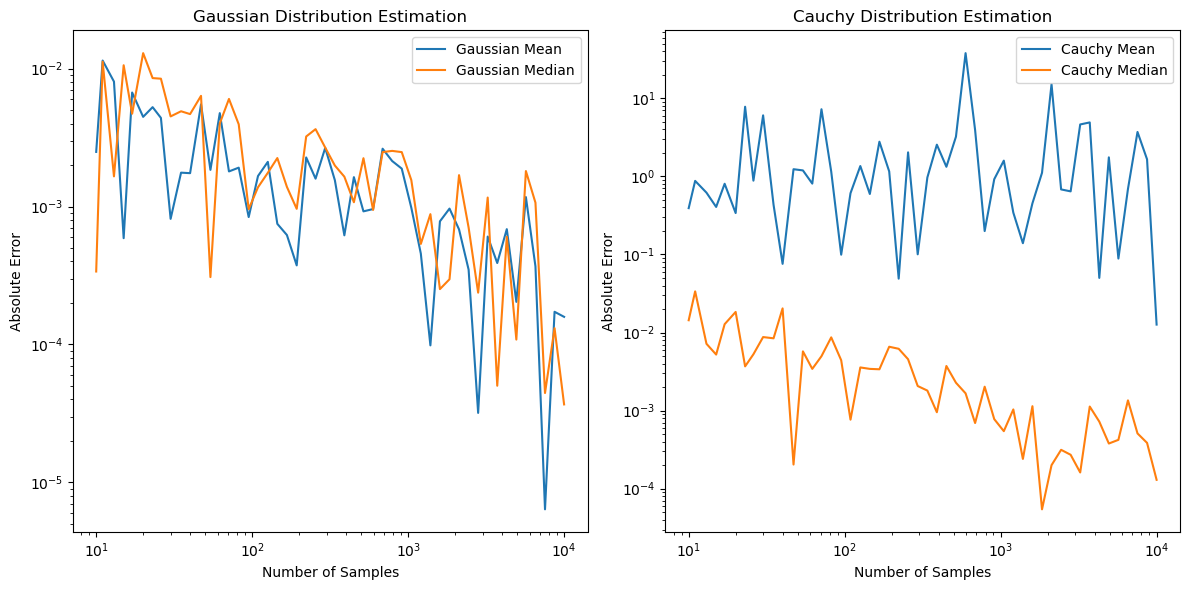

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def generate_and_estimate_samples(dist_func, n_samples_list, num_trials=1000):
    means = []
    medians = []
    
    for n in n_samples_list:
        trial_means = []
        trial_medians = []
        for _ in range(num_trials):
            samples = dist_func(n)
            trial_means.append(np.mean(samples))
            trial_medians.append(np.median(samples))
        
        means.append(np.mean(trial_means))
        medians.append(np.mean(trial_medians))

    return means, medians

# Gaussian distribution
n_samples_list = np.logspace(1, 4, 50).astype(int)  # Sample sizes from 10 to 10000
mu, sigma = 0, 1  # mean and standard deviation

gaussian_means, gaussian_medians = generate_and_estimate_samples(
    lambda n: np.random.normal(mu, sigma, n), 
    n_samples_list
)

# Cauchy distribution
cauchy_means, cauchy_medians = generate_and_estimate_samples(
    lambda n: np.random.standard_cauchy(n),  # Standard Cauchy has location=0, scale=1
    n_samples_list
)

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.loglog(n_samples_list, np.abs(np.array(gaussian_means) - mu), label='Gaussian Mean')
plt.loglog(n_samples_list, np.abs(np.array(gaussian_medians) - mu), label='Gaussian Median')
plt.title('Gaussian Distribution Estimation')
plt.xlabel('Number of Samples')
plt.ylabel('Absolute Error')
plt.legend()

plt.subplot(122)
plt.loglog(n_samples_list, np.abs(np.array(cauchy_means) - 0), label='Cauchy Mean')
plt.loglog(n_samples_list, np.abs(np.array(cauchy_medians) - 0), label='Cauchy Median')
plt.title('Cauchy Distribution Estimation')
plt.xlabel('Number of Samples')
plt.ylabel('Absolute Error')
plt.legend()

plt.tight_layout()
plt.savefig('distribution_estimates.png', dpi=300, bbox_inches='tight')  # Saves the figure as a PNG
plt.show()  # Optional: Show the plot on screen

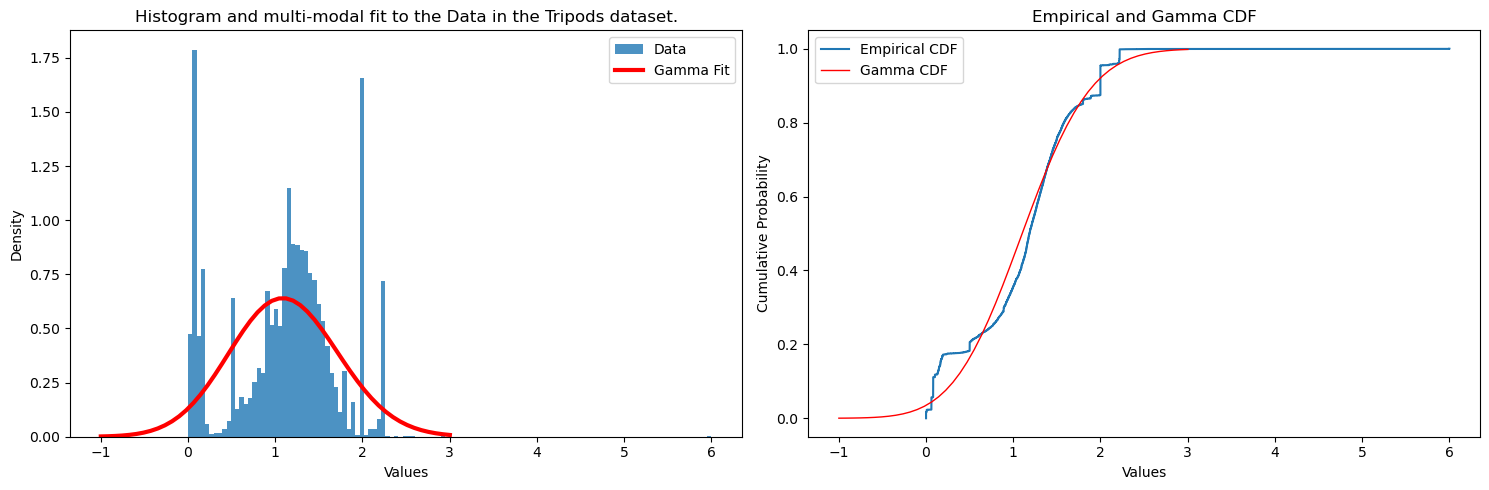

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF

def read_data(filename):
    data = []
    with open(filename, 'r') as file:
        for line in file:
            parts = line.strip().split()  # Split the line into parts
            if len(parts) > 1:            # Ensure there's at least a second column
                try:
                    # Convert the second element to float and append to data
                    data.append(float(parts[1]))
                except ValueError:
                    # Skip if conversion fails
                    continue
    return np.array(data) if data else np.array([])

def plot_distributions_and_fit(data, filename):
    if len(data) == 0:
        print("No valid data found in the second column.")
        return

    plt.figure(figsize=(15, 5))

    # Fit a Gamma distribution
    shape, loc, scale = stats.gamma.fit(data)
    
    # Histogram and Gamma PDF
    plt.subplot(121)
    plt.hist(data, bins='auto', density=True, edgecolor='none', alpha=0.8, label='Data')
    
    # Plot the PDF of the Gamma distribution
    x = np.linspace(min(data)-1, max(data)-3, 50)
    pdf = stats.gamma.pdf(x, shape, loc=loc, scale=scale)
    plt.plot(x, pdf, 'r-', lw=3, label='Gamma Fit')
    plt.title('Histogram and multi-modal fit to the Data in the Tripods dataset.')
    plt.xlabel('Values')
    plt.ylabel('Density')
    plt.legend()

    # Empirical CDF and Gamma CDF
    plt.subplot(122)
    ecdf = ECDF(data)
    plt.step(ecdf.x, ecdf.y, where='post', label='Empirical CDF')
    
    # Plot the CDF of the Gamma distribution
    cdf = stats.gamma.cdf(x, shape, loc=loc, scale=scale)
    plt.plot(x, cdf, 'r-', lw=1, label='Gamma CDF')
    
    plt.title('Empirical and Gamma CDF')
    plt.xlabel('Values')
    plt.ylabel('Cumulative Probability')
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'{filename[:-4]}_gamma_fit_post.png')  # Use the filename without extension
    plt.show()

if __name__ == "__main__":
    filename = 'C3_TripodsSetup.txt'  
    data = read_data(filename)
    if len(data) == 0:
        print("No valid data found in the second column.")
        exit()
    
    plot_distributions_and_fit(data, filename)

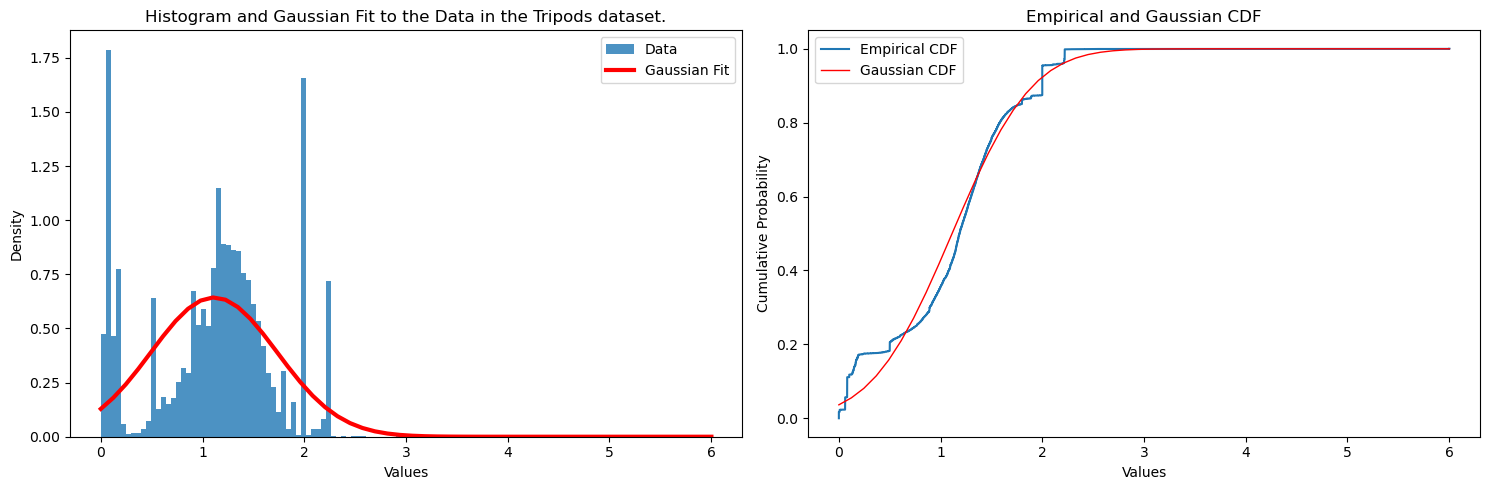

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF

def read_data(filename):
    data = []
    with open(filename, 'r') as file:
        for line in file:
            parts = line.strip().split()  # Split the line into parts
            if len(parts) > 1:            # Ensure there's at least a second column
                try:
                    # Convert the second element to float and append to data
                    data.append(float(parts[1]))
                except ValueError:
                    # Skip if conversion fails
                    continue
    return np.array(data) if data else np.array([])

def plot_distributions_and_fit(data, filename):
    if len(data) == 0:
        print("No valid data found in the second column.")
        return

    plt.figure(figsize=(15, 5))

    # Fit a Gaussian distribution
    mean, std = stats.norm.fit(data)
    
    # Histogram and Gaussian PDF
    plt.subplot(121)
    plt.hist(data, bins='auto', density=True, edgecolor='none', alpha=0.8, label='Data')
    
    # Plot the PDF of the Gaussian distribution
    x = np.linspace(min(data), max(data), 50)
    pdf = stats.norm.pdf(x, mean, std)
    plt.plot(x, pdf, 'r-', lw=3, label='Gaussian Fit')
    plt.title('Histogram and Gaussian Fit to the Data in the Tripods dataset.')
    plt.xlabel('Values')
    plt.ylabel('Density')
    plt.legend()

    # Empirical CDF and Gaussian CDF
    plt.subplot(122)
    ecdf = ECDF(data)
    plt.step(ecdf.x, ecdf.y, where='post', label='Empirical CDF')
    
    # Plot the CDF of the Gaussian distribution
    cdf = stats.norm.cdf(x, mean, std)
    plt.plot(x, cdf, 'r-', lw=1, label='Gaussian CDF')
    
    plt.title('Empirical and Gaussian CDF')
    plt.xlabel('Values')
    plt.ylabel('Cumulative Probability')
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'{filename[:-4]}_gaussian_fit.png')  # Use the filename without extension
    plt.show()

if __name__ == "__main__":
    filename = 'C3_TripodsSetup.txt'  
    data = read_data(filename)
    
    if len(data) == 0:
        print("No valid data found in the second column.")
        exit()
    
    plot_distributions_and_fit(data, filename)

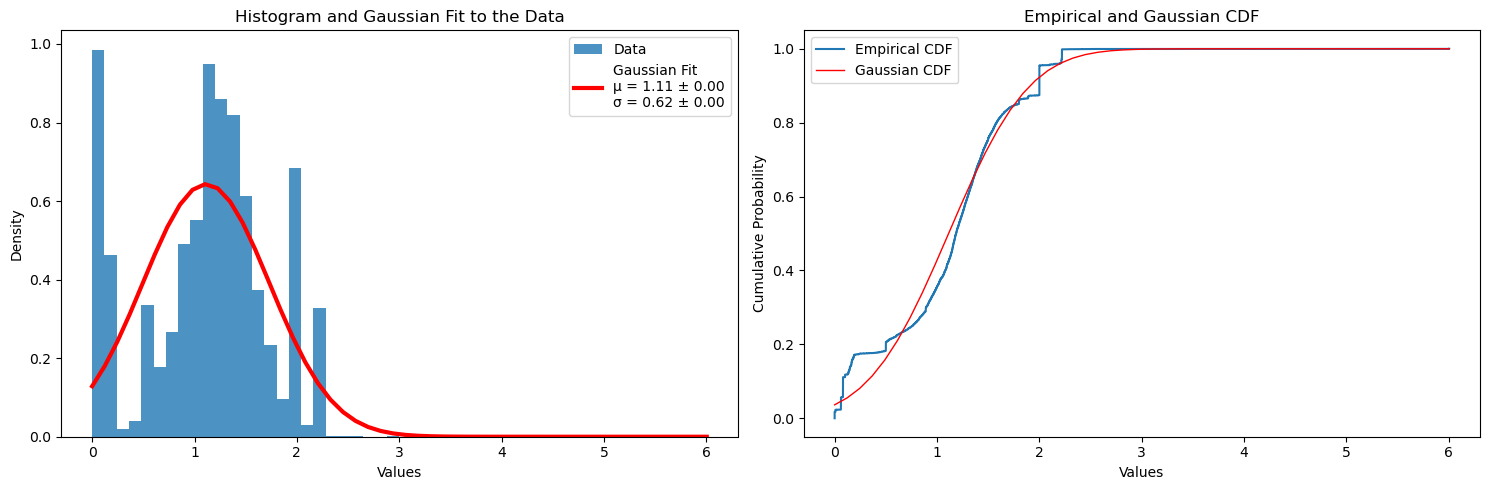

Bootstrap Statistics:
Mean: 1.11 ± 0.00
Standard Deviation: 0.62 ± 0.00


In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.utils import resample

def read_data(filename):
    data = []
    with open(filename, 'r') as file:
        for line in file:
            parts = line.strip().split()  # Split the line into parts
            if len(parts) > 1:            # Ensure there's at least a second column
                try:
                    data.append(float(parts[1]))
                except ValueError:
                    continue
    return np.array(data) if data else np.array([])

def plot_distributions_and_fit(data, filename):
    if len(data) == 0:
        print("No valid data found in the second column.")
        return

    plt.figure(figsize=(15, 5))

    # Fit a Gaussian distribution
    mean, std = stats.norm.fit(data)
    
    # Bootstrap for uncertainty estimation
    bootstrap_samples = 1000
    bootstrap_means = np.zeros(bootstrap_samples)
    bootstrap_stds = np.zeros(bootstrap_samples)

    for i in range(bootstrap_samples):
        sample = resample(data)
        bootstrap_means[i], bootstrap_stds[i] = stats.norm.fit(sample)

    # Histogram and Gaussian PDF
    plt.subplot(121)
    plt.hist(data, bins=50, density=True, edgecolor='none', alpha=0.8, label='Data')
    x = np.linspace(min(data), max(data), 50)
    pdf = stats.norm.pdf(x, mean, std)
    plt.plot(x, pdf, 'r-', lw=3, label=f'Gaussian Fit\nμ = {mean:.2f} ± {np.std(bootstrap_means):.2f}\nσ = {std:.2f} ± {np.std(bootstrap_stds):.2f}')
    plt.title('Histogram and Gaussian Fit to the Data')
    plt.xlabel('Values')
    plt.ylabel('Density')
    plt.legend()

    # Empirical CDF and Gaussian CDF
    plt.subplot(122)
    ecdf = ECDF(data)
    plt.step(ecdf.x, ecdf.y, where='post', label='Empirical CDF')
    cdf = stats.norm.cdf(x, mean, std)
    plt.plot(x, cdf, 'r-', lw=1, label='Gaussian CDF')
    plt.title('Empirical and Gaussian CDF')
    plt.xlabel('Values')
    plt.ylabel('Cumulative Probability')
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'{filename[:-4]}_gaussian_fit_with_bootstrap.png')
    plt.show()

    print(f"Bootstrap Statistics:")
    print(f"Mean: {mean:.2f} ± {np.std(bootstrap_means):.2f}")
    print(f"Standard Deviation: {std:.2f} ± {np.std(bootstrap_stds):.2f}")

if __name__ == "__main__":
    filename = 'C3_TripodsSetup.txt'
    data = read_data(filename)
    
    if len(data) == 0:
        print("No valid data found in the second column.")
        exit()
    
    plot_distributions_and_fit(data, filename)

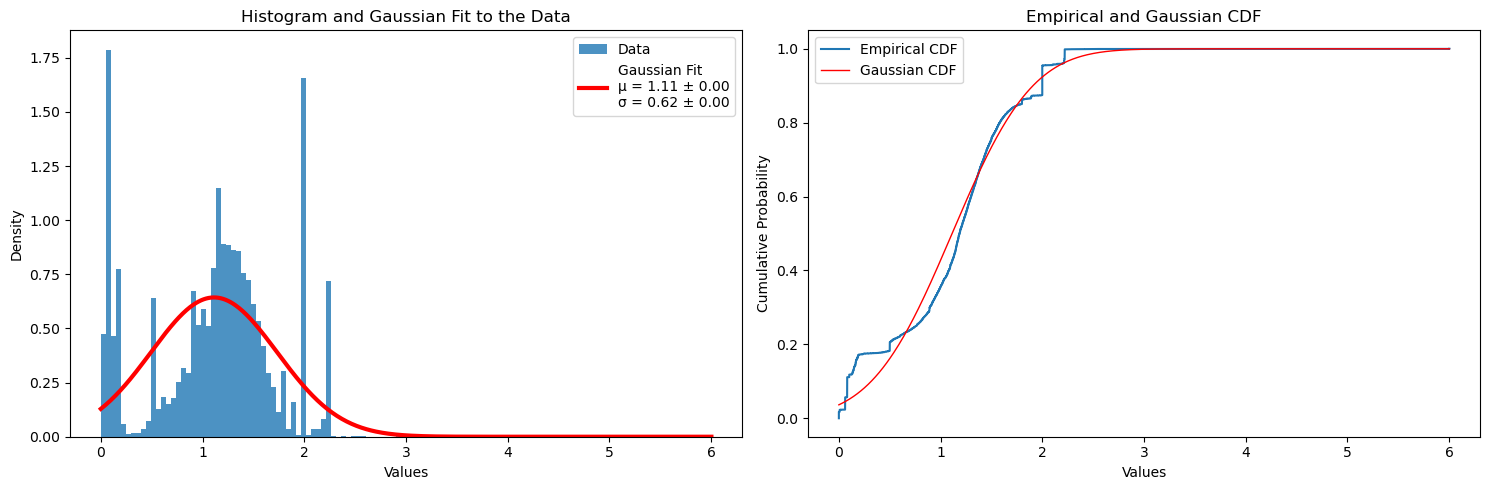

Bootstrap Statistics:
Mean: 1.11 ± 0.00
Standard Deviation: 0.62 ± 0.00


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.utils import resample

def read_data(filename):
    data = []
    with open(filename, 'r') as file:
        for line in file:
            parts = line.strip().split()  # Split the line into parts
            if len(parts) > 1:            # Ensure there's at least a second column
                try:
                    data.append(float(parts[1]))
                except ValueError:
                    continue
    return np.array(data) if data else np.array([])

def plot_distributions_and_fit(data, filename):
    if len(data) == 0:
        print("No valid data found in the second column.")
        return

    plt.figure(figsize=(15, 5))

    # Fit a Gaussian distribution
    mean, std = stats.norm.fit(data)
    
    # Bootstrap for uncertainty estimation
    bootstrap_samples = 1000
    bootstrap_means = np.zeros(bootstrap_samples)
    bootstrap_stds = np.zeros(bootstrap_samples)

    for i in range(bootstrap_samples):
        sample = resample(data)
        bootstrap_means[i], bootstrap_stds[i] = stats.norm.fit(sample)

    # Histogram and Gaussian PDF
    plt.subplot(121)
    plt.hist(data, bins='auto', density=True, edgecolor='none', alpha=0.8, label='Data')
    x = np.linspace(min(data), max(data), 500)  # Increased resolution for smoother curve
    pdf = stats.norm.pdf(x, mean, std)
    plt.plot(x, pdf, 'r-', lw=3, label=f'Gaussian Fit\nμ = {mean:.2f} ± {np.std(bootstrap_means):.2f}\nσ = {std:.2f} ± {np.std(bootstrap_stds):.2f}')
    plt.title('Histogram and Gaussian Fit to the Data')
    plt.xlabel('Values')
    plt.ylabel('Density')
    plt.legend()

    # Empirical CDF and Gaussian CDF
    plt.subplot(122)
    ecdf = ECDF(data)
    plt.step(ecdf.x, ecdf.y, where='post', label='Empirical CDF')
    cdf = stats.norm.cdf(x, mean, std)
    plt.plot(x, cdf, 'r-', lw=1, label='Gaussian CDF')
    plt.title('Empirical and Gaussian CDF')
    plt.xlabel('Values')
    plt.ylabel('Cumulative Probability')
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'{filename[:-4]}_gaussian_fit_with_bootstrap.png')
    plt.show()

    print(f"Bootstrap Statistics:")
    print(f"Mean: {mean:.2f} ± {np.std(bootstrap_means):.2f}")
    print(f"Standard Deviation: {std:.2f} ± {np.std(bootstrap_stds):.2f}")

if __name__ == "__main__":
    filename = 'C3_TripodsSetup.txt'  # Ensure this path is correct
    data = read_data(filename)
    
    if len(data) == 0:
        print("No valid data found in the second column.")
        exit()
    
    plot_distributions_and_fit(data, filename)

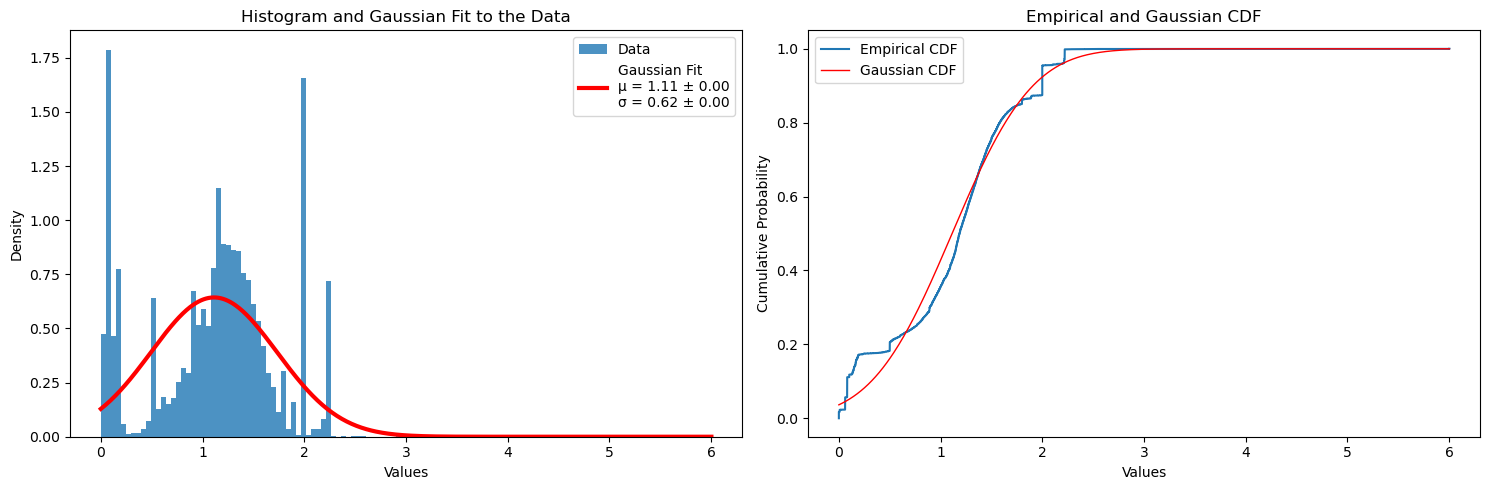

Bootstrap Statistics:
Mean: 1.11 ± 0.00
Standard Deviation: 0.62 ± 0.00


In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.utils import resample

def read_data(filename):
    data = []
    with open(filename, 'r') as file:
        for line in file:
            parts = line.strip().split()  # Split the line into parts
            if len(parts) > 1:            # Ensure there's at least a second column
                try:
                    data.append(float(parts[1]))
                except ValueError:
                    continue
    return np.array(data) if data else np.array([])

def plot_distributions_and_fit(data, filename):
    if len(data) == 0:
        print("No valid data found in the second column.")
        return

    plt.figure(figsize=(15, 5))

    # Fit a Gaussian distribution
    mean, std = stats.norm.fit(data)
    
    # Bootstrap for uncertainty estimation
    bootstrap_samples = 1000
    bootstrap_means = []
    bootstrap_stds = []

    for _ in range(bootstrap_samples):
        sample = resample(data)
        temp_mean, temp_std = stats.norm.fit(sample)
        bootstrap_means.append(temp_mean)
        # Check if the standard deviation is zero and handle it
        if temp_std > 0:
            bootstrap_stds.append(temp_std)
        else:
            bootstrap_stds.append(np.std(sample))  # Or some other sensible default

    bootstrap_means = np.array(bootstrap_means)
    bootstrap_stds = np.array(bootstrap_stds)

    # Histogram and Gaussian PDF
    plt.subplot(121)
    plt.hist(data, bins='auto', density=True, edgecolor='none', alpha=0.8, label='Data')
    x = np.linspace(min(data), max(data), 500)
    pdf = stats.norm.pdf(x, mean, std)
    plt.plot(x, pdf, 'r-', lw=3, label=f'Gaussian Fit\nμ = {mean:.2f} ± {np.std(bootstrap_means):.2f}\nσ = {std:.2f} ± {np.std(bootstrap_stds):.2f}')
    plt.title('Histogram and Gaussian Fit to the Data')
    plt.xlabel('Values')
    plt.ylabel('Density')
    plt.legend()

    # Empirical CDF and Gaussian CDF
    plt.subplot(122)
    ecdf = ECDF(data)
    plt.step(ecdf.x, ecdf.y, where='post', label='Empirical CDF')
    cdf = stats.norm.cdf(x, mean, std)
    plt.plot(x, cdf, 'r-', lw=1, label='Gaussian CDF')
    plt.title('Empirical and Gaussian CDF')
    plt.xlabel('Values')
    plt.ylabel('Cumulative Probability')
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'{filename[:-4]}_gaussian_fit_with_bootstrap.png')
    plt.show()

    print(f"Bootstrap Statistics:")
    print(f"Mean: {mean:.2f} ± {np.std(bootstrap_means):.2f}")
    print(f"Standard Deviation: {std:.2f} ± {np.std(bootstrap_stds):.2f}")

if __name__ == "__main__":
    filename = 'C3_TripodsSetup.txt'  # Ensure this path is correct
    data = read_data(filename)
    
    if len(data) == 0:
        print("No valid data found in the second column.")
        exit()
    
    plot_distributions_and_fit(data, filename)

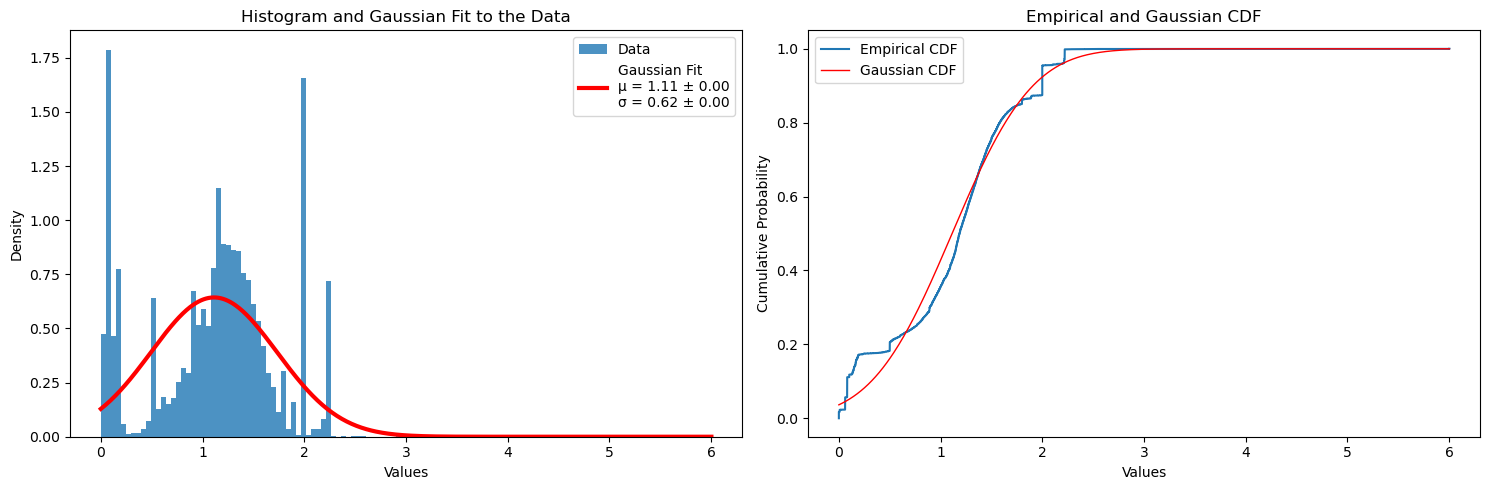

Bootstrap Statistics:
Mean: 1.11 ± 0.00
Standard Deviation: 0.62 ± 0.00


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.utils import resample

def read_data(filename):
    data = []
    with open(filename, 'r') as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) > 1:
                try:
                    data.append(float(parts[1]))
                except ValueError:
                    continue
    return np.array(data) if data else np.array([])

def bootstrap_uncertainty(data, num_samples=1000):
    bootstrap_means = []
    bootstrap_stds = []
    for _ in range(num_samples):
        sample = resample(data)
        mean, std = stats.norm.fit(sample)
        bootstrap_means.append(mean)
        if std > 0:  # Ensure std is positive
            bootstrap_stds.append(std)
        else:
            bootstrap_stds.append(np.std(sample, ddof=1))  # Use sample std if fit std is zero

    return np.std(bootstrap_means), np.std(bootstrap_stds)

def plot_distributions_and_fit(data, filename):
    if len(data) == 0:
        print("No valid data found in the second column.")
        return

    plt.figure(figsize=(15, 5))

    # Fit a Gaussian distribution
    mean, std = stats.norm.fit(data)
    
    # Bootstrap for uncertainty estimation
    mean_uncertainty, std_uncertainty = bootstrap_uncertainty(data)

    # Histogram and Gaussian PDF
    plt.subplot(121)
    plt.hist(data, bins='auto', density=True, edgecolor='none', alpha=0.8, label='Data')
    x = np.linspace(min(data), max(data), 500)
    pdf = stats.norm.pdf(x, mean, std)
    plt.plot(x, pdf, 'r-', lw=3, label=f'Gaussian Fit\nμ = {mean:.2f} ± {mean_uncertainty:.2f}\nσ = {std:.2f} ± {std_uncertainty:.2f}')
    plt.title('Histogram and Gaussian Fit to the Data')
    plt.xlabel('Values')
    plt.ylabel('Density')
    plt.legend()

    # Empirical CDF and Gaussian CDF
    plt.subplot(122)
    ecdf = ECDF(data)
    plt.step(ecdf.x, ecdf.y, where='post', label='Empirical CDF')
    cdf = stats.norm.cdf(x, mean, std)
    plt.plot(x, cdf, 'r-', lw=1, label='Gaussian CDF')
    plt.title('Empirical and Gaussian CDF')
    plt.xlabel('Values')
    plt.ylabel('Cumulative Probability')
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'{filename[:-4]}_gaussian_fit_with_bootstrap.png')
    plt.show()

    print(f"Bootstrap Statistics:")
    print(f"Mean: {mean:.2f} ± {mean_uncertainty:.2f}")
    print(f"Standard Deviation: {std:.2f} ± {std_uncertainty:.2f}")

if __name__ == "__main__":
    filename = 'C3_TripodsSetup.txt'  
    data = read_data(filename)
    
    if len(data) == 0:
        print("No valid data found in the second column.")
        exit()
    
    plot_distributions_and_fit(data, filename)

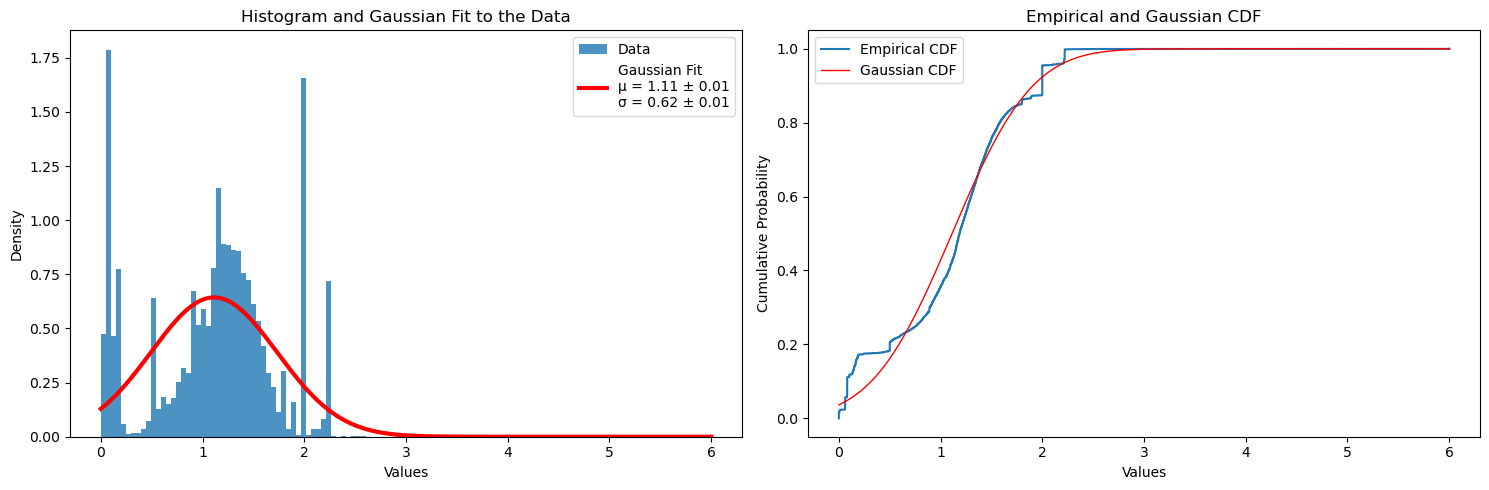

Bootstrap Statistics:
Mean: 1.11 ± 0.01
Standard Deviation: 0.62 ± 0.01


In [73]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.utils import resample

def read_data(filename):
    data = []
    with open(filename, 'r') as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) > 1:
                try:
                    data.append(float(parts[1]))
                except ValueError:
                    continue
    return np.array(data) if data else np.array([])

def bootstrap_uncertainty(data, num_samples=1000):
    bootstrap_means = []
    bootstrap_stds = []
    for _ in range(num_samples):
        sample = resample(data)
        # Use a small epsilon to avoid zero standard deviation due to identical samples
        epsilon = np.finfo(float).eps * 100  # Epsilon based on machine precision
        sample += np.random.uniform(-epsilon, epsilon, size=len(sample))
        
        mean, std = stats.norm.fit(sample)
        bootstrap_means.append(mean)
        # Clamp the standard deviation to a minimum value to avoid zero uncertainty
        std = max(std, 1e-6)  # Set minimum std to 1e-6 to ensure non-zero uncertainty
        
        bootstrap_stds.append(std)

    # Use the 95% confidence interval for uncertainty
    mean_uncertainty = np.percentile(bootstrap_means, [97.5]) - np.percentile(bootstrap_means, [2.5])
    std_uncertainty = np.percentile(bootstrap_stds, [97.5]) - np.percentile(bootstrap_stds, [2.5])
    
    return mean_uncertainty[0], std_uncertainty[0]

def plot_distributions_and_fit(data, filename):
    if len(data) == 0:
        print("No valid data found in the second column.")
        return

    plt.figure(figsize=(15, 5))

    # Fit a Gaussian distribution
    mean, std = stats.norm.fit(data)
    
    # Bootstrap for uncertainty estimation
    mean_uncertainty, std_uncertainty = bootstrap_uncertainty(data)

    # Histogram and Gaussian PDF
    plt.subplot(121)
    plt.hist(data, bins='auto', density=True, edgecolor='none', alpha=0.8, label='Data')
    x = np.linspace(min(data), max(data), 500)
    pdf = stats.norm.pdf(x, mean, std)
    plt.plot(x, pdf, 'r-', lw=3, label=f'Gaussian Fit\nμ = {mean:.2f} ± {mean_uncertainty:.2f}\nσ = {std:.2f} ± {std_uncertainty:.2f}')
    plt.title('Histogram and Gaussian Fit to the Data')
    plt.xlabel('Values')
    plt.ylabel('Density')
    plt.legend()

    # Empirical CDF and Gaussian CDF
    plt.subplot(122)
    ecdf = ECDF(data)
    plt.step(ecdf.x, ecdf.y, where='post', label='Empirical CDF')
    cdf = stats.norm.cdf(x, mean, std)
    plt.plot(x, cdf, 'r-', lw=1, label='Gaussian CDF')
    plt.title('Empirical and Gaussian CDF')
    plt.xlabel('Values')
    plt.ylabel('Cumulative Probability')
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'{filename[:-4]}_gaussian_fit_with_bootstrap.png')
    plt.show()

    print(f"Bootstrap Statistics:")
    print(f"Mean: {mean:.2f} ± {mean_uncertainty:.2f}")
    print(f"Standard Deviation: {std:.2f} ± {std_uncertainty:.2f}")

if __name__ == "__main__":
    filename = 'C3_TripodsSetup.txt'  
    data = read_data(filename)
    
    if len(data) == 0:
        print("No valid data found in the second column.")
        exit()
    
    plot_distributions_and_fit(data, filename)

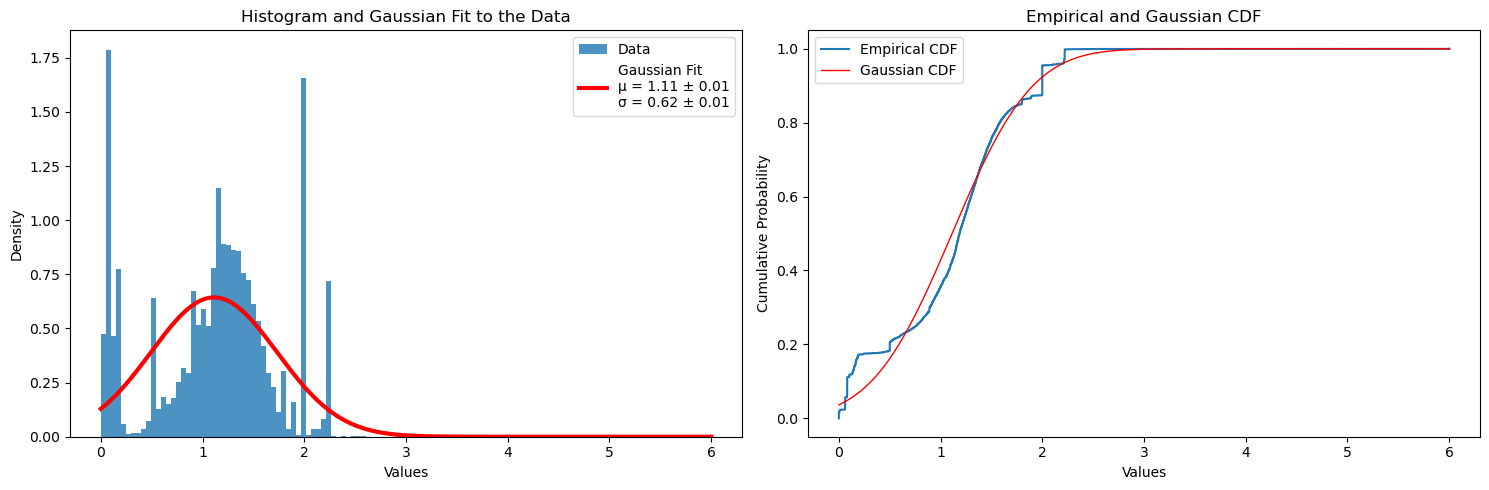

Bootstrap Statistics:
Mean: 1.11 ± 0.01
Standard Deviation: 0.62 ± 0.01


In [77]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.utils import resample

def read_data(filename):
    data = []
    with open(filename, 'r') as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) > 1:
                try:
                    data.append(float(parts[1]))
                except ValueError:
                    continue
    return np.array(data) if data else np.array([])

def bootstrap_uncertainty(data, num_samples=1000, conf_level=0.95):
    # Check if data has any variation
    if np.std(data) <= np.finfo(float).eps:
        return 0.0, 0.0  # If data has no variation, return zero uncertainty

    bootstrap_means = []
    bootstrap_stds = []
    for _ in range(num_samples):
        sample = resample(data)
        epsilon = np.random.uniform(-1e-8, 1e-8, size=len(sample))  # More precise epsilon
        sample += epsilon

        mean, std = stats.norm.fit(sample)
        # Use sample std if fit std is too small or negative
        std = max(std, np.std(sample, ddof=1)) if std > 0 else np.std(sample, ddof=1)
        
        bootstrap_means.append(mean)
        bootstrap_stds.append(std)

    # Calculate percentiles for confidence interval
    lower, upper = ((1 - conf_level) / 2, (1 - conf_level) / 2 + conf_level)
    mean_ci = np.percentile(bootstrap_means, [lower * 100, upper * 100])
    std_ci = np.percentile(bootstrap_stds, [lower * 100, upper * 100])
    
    return (mean_ci[1] - mean_ci[0]) / 2, (std_ci[1] - std_ci[0]) / 2  # Half width of CI

def plot_distributions_and_fit(data, filename):
    if len(data) == 0:
        print("No valid data found in the second column.")
        return

    plt.figure(figsize=(15, 5))

    # Fit a Gaussian distribution
    mean, std = stats.norm.fit(data)
    
    # Bootstrap for uncertainty estimation
    mean_uncertainty, std_uncertainty = bootstrap_uncertainty(data)

    # Histogram and Gaussian PDF
    plt.subplot(121)
    plt.hist(data, bins='auto', density=True, edgecolor='none', alpha=0.8, label='Data')
    x = np.linspace(min(data), max(data), 500)
    pdf = stats.norm.pdf(x, mean, std)
    plt.plot(x, pdf, 'r-', lw=3, label=f'Gaussian Fit\nμ = {mean:.2f} ± {mean_uncertainty:.2f}\nσ = {std:.2f} ± {std_uncertainty:.2f}')
    plt.title('Histogram and Gaussian Fit to the Data')
    plt.xlabel('Values')
    plt.ylabel('Density')
    plt.legend()

    # Empirical CDF and Gaussian CDF
    plt.subplot(122)
    ecdf = ECDF(data)
    plt.step(ecdf.x, ecdf.y, where='post', label='Empirical CDF')
    cdf = stats.norm.cdf(x, mean, std)
    plt.plot(x, cdf, 'r-', lw=1, label='Gaussian CDF')
    plt.title('Empirical and Gaussian CDF')
    plt.xlabel('Values')
    plt.ylabel('Cumulative Probability')
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'{filename[:-4]}_gaussian_fit_with_bootstrap.png')
    plt.show()

    print(f"Bootstrap Statistics:")
    print(f"Mean: {mean:.2f} ± {mean_uncertainty:.2f}")
    print(f"Standard Deviation: {std:.2f} ± {std_uncertainty:.2f}")

if __name__ == "__main__":
    filename = 'C3_TripodsSetup.txt'
    data = read_data(filename)
    
    if len(data) == 0:
        print("No valid data found in the second column.")
        exit()
    
    plot_distributions_and_fit(data, filename)

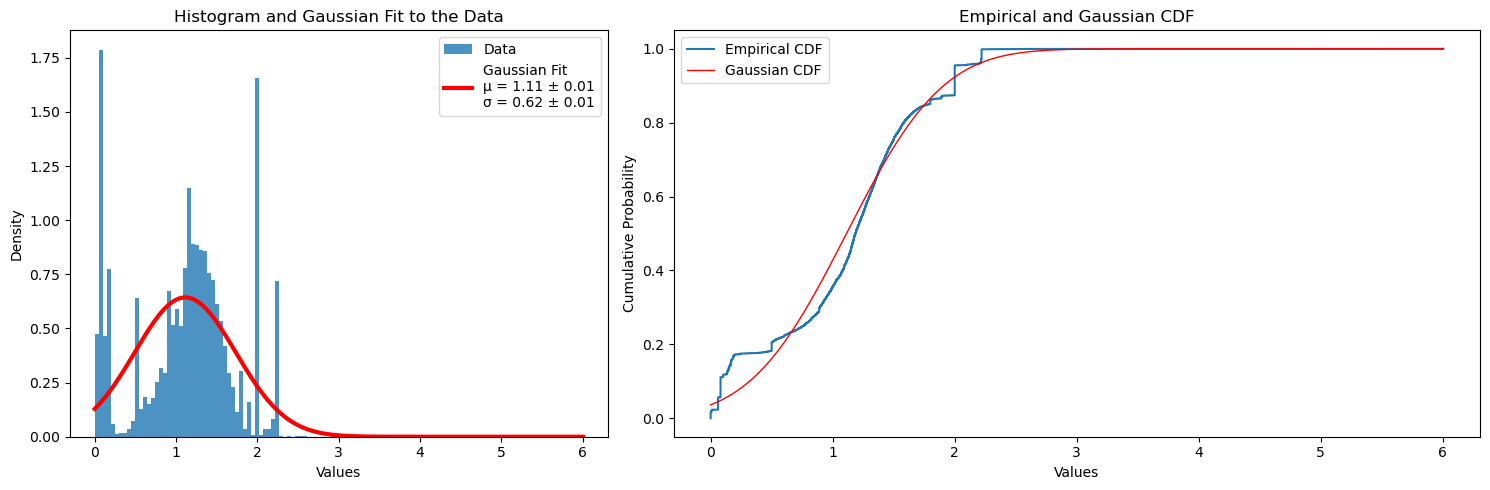

Bootstrap Statistics:
Mean: 1.11 ± 0.01
Standard Deviation: 0.62 ± 0.01


In [83]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.utils import resample

def read_data(filename):
    data = []
    with open(filename, 'r') as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) > 1:
                try:
                    data.append(float(parts[1]))
                except ValueError:
                    continue
    return np.array(data) if data else np.array([])

def bootstrap_uncertainty(data, num_samples=1000, conf_level=0.95):
    # If data has no variation, return zero uncertainty
    if np.std(data) <= np.finfo(float).eps:
        return 0.0, 0.0

    bootstrap_means = []
    bootstrap_stds = []
    for _ in range(num_samples):
        sample = resample(data)
        epsilon = np.random.uniform(-1e-8, 1e-8, size=len(sample))
        sample += epsilon

        mean, std = stats.norm.fit(sample)
        std = max(std, np.std(sample, ddof=1)) if std > 0 else np.std(sample, ddof=1)
        
        bootstrap_means.append(mean)
        bootstrap_stds.append(std)

    lower, upper = ((1 - conf_level) / 2, (1 - conf_level) / 2 + conf_level)
    mean_ci = np.percentile(bootstrap_means, [lower * 100, upper * 100])
    std_ci = np.percentile(bootstrap_stds, [lower * 100, upper * 100])
    
    return (mean_ci[1] - mean_ci[0]) / 2, (std_ci[1] - std_ci[0]) / 2

def plot_distributions_and_fit(data, filename):
    if len(data) == 0:
        print("No valid data found in the second column.")
        return

    plt.figure(figsize=(15, 5))

    # Fit a Gaussian distribution
    mean, std = stats.norm.fit(data)
    
    # Bootstrap for uncertainty estimation
    mean_uncertainty, std_uncertainty = bootstrap_uncertainty(data)

    # Create a grid for subplots with more control over layout
    gs = plt.GridSpec(1, 2, width_ratios=[2, 3])  # Histogram takes up 2 units, CDF takes 3

    # Histogram and Gaussian PDF
    ax1 = plt.subplot(gs[0])
    ax1.hist(data, bins='auto', density=True, edgecolor='none', alpha=0.8, label='Data')
    x = np.linspace(min(data), max(data), 500)
    pdf = stats.norm.pdf(x, mean, std)
    ax1.plot(x, pdf, 'r-', lw=3, label=f'Gaussian Fit\nμ = {mean:.2f} ± {mean_uncertainty:.2f}\nσ = {std:.2f} ± {std_uncertainty:.2f}')
    ax1.set_title('Histogram and Gaussian Fit to the Data')
    ax1.set_xlabel('Values')
    ax1.set_ylabel('Density')
    ax1.legend()

    # Empirical CDF and Gaussian CDF
    ax2 = plt.subplot(gs[1])
    ecdf = ECDF(data)
    ax2.step(ecdf.x, ecdf.y, where='post', label='Empirical CDF')
    cdf = stats.norm.cdf(x, mean, std)
    ax2.plot(x, cdf, 'r-', lw=1, label='Gaussian CDF')
    ax2.set_title('Empirical and Gaussian CDF')
    ax2.set_xlabel('Values')
    ax2.set_ylabel('Cumulative Probability')
    ax2.legend()

    plt.tight_layout()
    plt.savefig(f'{filename[:-4]}_gaussian_fit_with_bootstrap.png')
    plt.show()

    print(f"Bootstrap Statistics:")
    print(f"Mean: {mean:.2f} ± {mean_uncertainty:.2f}")
    print(f"Standard Deviation: {std:.2f} ± {std_uncertainty:.2f}")

if __name__ == "__main__":
    filename = 'C3_TripodsSetup.txt'  
    data = read_data(filename)
    
    if len(data) == 0:
        print("No valid data found in the second column.")
        exit()
    
    plot_distributions_and_fit(data, filename)

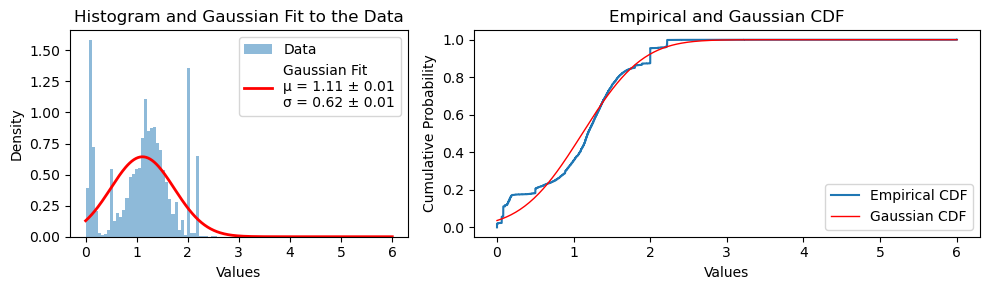

Bootstrap Statistics:
Mean: 1.11 ± 0.01
Standard Deviation: 0.62 ± 0.01


In [143]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.utils import resample

def read_data(filename):
    data = []
    with open(filename, 'r') as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) > 1:
                try:
                    data.append(float(parts[1]))
                except ValueError:
                    continue
    return np.array(data) if data else np.array([])

def bootstrap_uncertainty(data, num_samples=100, conf_level=0.95):
    if np.std(data) <= np.finfo(float).eps:
        return 0.0, 0.0

    bootstrap_means = []
    bootstrap_stds = []
    for _ in range(num_samples):
        sample = resample(data)
        epsilon = np.random.uniform(-1e-9, 1e-9, size=len(sample))
        sample += epsilon
        mean, std = stats.norm.fit(sample)
        std = max(std, np.std(sample, ddof=1)) if std > 0 else np.std(sample, ddof=1)
        bootstrap_means.append(mean)
        bootstrap_stds.append(std)

    lower, upper = ((1 - conf_level) / 2, (1 - conf_level) / 2 + conf_level)
    mean_ci = np.percentile(bootstrap_means, [lower * 100, upper * 100])
    std_ci = np.percentile(bootstrap_stds, [lower * 100, upper * 100])
    
    return (mean_ci[1] - mean_ci[0]) / 2, (std_ci[1] - std_ci[0]) / 2

def plot_distributions_and_fit(data, filename):
    if len(data) == 0:
        print("No valid data found in the second column.")
        return

    plt.figure(figsize=(10, 3))
    # Fit a Gaussian distribution
    mean, std = stats.norm.fit(data)
    
    # Bootstrap for uncertainty estimation
    mean_uncertainty, std_uncertainty = bootstrap_uncertainty(data)

    # Create a grid for subplots
    gs = plt.GridSpec(1, 2, width_ratios=[2, 3])

    # Histogram and Gaussian PDF
    ax1 = plt.subplot(gs[0])
    
    # Calculate range for histogram
    data_range = max(data) - min(data)
    bins = np.linspace(mean - data_range, mean + data_range, num=100)  # Adjust 'num' for more or fewer bins
    
    ax1.hist(data, bins=100, density=True, edgecolor='none', alpha=0.5, label='Data')
    x = np.linspace(min(data), max(data), 300)
    pdf = stats.norm.pdf(x, mean, std)
    ax1.plot(x, pdf, 'r-', lw=2, label=f'Gaussian Fit\nμ = {mean:.2f} ± {mean_uncertainty:.2f}\nσ = {std:.2f} ± {std_uncertainty:.2f}')
    ax1.set_title('Histogram and Gaussian Fit to the Data')
    ax1.set_xlabel('Values')
    ax1.set_ylabel('Density')
    ax1.legend()

    # Empirical CDF and Gaussian CDF
    ax2 = plt.subplot(gs[1])
    ecdf = ECDF(data)
    ax2.step(ecdf.x, ecdf.y, where='post', label='Empirical CDF')
    cdf = stats.norm.cdf(x, mean, std)
    ax2.plot(x, cdf, 'r-', lw=1, label='Gaussian CDF')
    ax2.set_title('Empirical and Gaussian CDF')
    ax2.set_xlabel('Values')
    ax2.set_ylabel('Cumulative Probability')
    ax2.legend()

    plt.tight_layout()
    plt.savefig(f'{filename[:-4]}_gaussian_fit_with_bootstrap.png')
    plt.show()

    print(f"Bootstrap Statistics:")
    print(f"Mean: {mean:.2f} ± {mean_uncertainty:.2f}")
    print(f"Standard Deviation: {std:.2f} ± {std_uncertainty:.2f}")

if __name__ == "__main__":
    filename = 'C3_TripodsSetup.txt'
    data = read_data(filename)
    
    if len(data) == 0:
        print("No valid data found in the second column.")
        exit()
    
    plot_distributions_and_fit(data, filename)

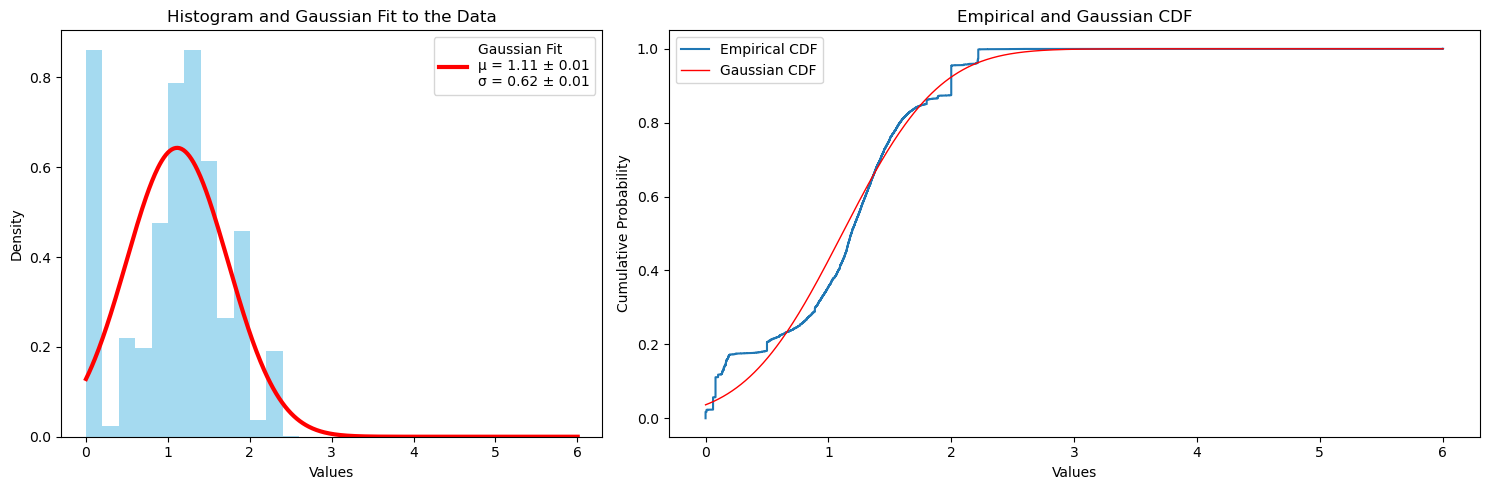

Bootstrap Statistics:
Mean: 1.11 ± 0.01
Standard Deviation: 0.62 ± 0.01


In [145]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.utils import resample

def read_data(filename):
    data = []
    with open(filename, 'r') as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) > 1:
                try:
                    data.append(float(parts[1]))
                except ValueError:
                    continue
    return np.array(data) if data else np.array([])

def bootstrap_uncertainty(data, num_samples=1000, conf_level=0.95):
    if np.std(data) <= np.finfo(float).eps:
        return 0.0, 0.0

    bootstrap_means = []
    bootstrap_stds = []
    for _ in range(num_samples):
        sample = resample(data)
        epsilon = np.random.uniform(-1e-8, 1e-8, size=len(sample))
        sample += epsilon

        mean, std = stats.norm.fit(sample)
        std = max(std, np.std(sample, ddof=1)) if std > 0 else np.std(sample, ddof=1)
        
        bootstrap_means.append(mean)
        bootstrap_stds.append(std)

    lower, upper = ((1 - conf_level) / 2, (1 - conf_level) / 2 + conf_level)
    mean_ci = np.percentile(bootstrap_means, [lower * 100, upper * 100])
    std_ci = np.percentile(bootstrap_stds, [lower * 100, upper * 100])
    
    return (mean_ci[1] - mean_ci[0]) / 2, (std_ci[1] - std_ci[0]) / 2

def plot_distributions_and_fit(data, filename):
    if len(data) == 0:
        print("No valid data found in the second column.")
        return

    plt.figure(figsize=(15, 5))
    
    # Fit a Gaussian distribution
    mean, std = stats.norm.fit(data)
    
    # Bootstrap for uncertainty estimation
    mean_uncertainty, std_uncertainty = bootstrap_uncertainty(data)

    # Use seaborn for histogram
    gs = plt.GridSpec(1, 2, width_ratios=[2, 3])

    # Histogram using seaborn
    ax1 = plt.subplot(gs[0])
    sns.histplot(data, kde=False, stat="density", bins=30, ax=ax1, color='skyblue', edgecolor='none')
    
    # Overlay the Gaussian fit
    x = np.linspace(min(data), max(data), 500)
    pdf = stats.norm.pdf(x, mean, std)
    ax1.plot(x, pdf, 'r-', lw=3, label=f'Gaussian Fit\nμ = {mean:.2f} ± {mean_uncertainty:.2f}\nσ = {std:.2f} ± {std_uncertainty:.2f}')
    ax1.set_title('Histogram and Gaussian Fit to the Data')
    ax1.set_xlabel('Values')
    ax1.set_ylabel('Density')
    ax1.legend()

    # Empirical CDF and Gaussian CDF
    ax2 = plt.subplot(gs[1])
    ecdf = ECDF(data)
    ax2.step(ecdf.x, ecdf.y, where='post', label='Empirical CDF')
    cdf = stats.norm.cdf(x, mean, std)
    ax2.plot(x, cdf, 'r-', lw=1, label='Gaussian CDF')
    ax2.set_title('Empirical and Gaussian CDF')
    ax2.set_xlabel('Values')
    ax2.set_ylabel('Cumulative Probability')
    ax2.legend()

    plt.tight_layout()
    plt.savefig(f'{filename[:-4]}_gaussian_fit_with_bootstrap.png')
    plt.show()

    print(f"Bootstrap Statistics:")
    print(f"Mean: {mean:.2f} ± {mean_uncertainty:.2f}")
    print(f"Standard Deviation: {std:.2f} ± {std_uncertainty:.2f}")

if __name__ == "__main__":
    filename = 'C3_TripodsSetup.txt'
    data = read_data(filename)
    
    if len(data) == 0:
        print("No valid data found in the second column.")
        exit()
    
    plot_distributions_and_fit(data, filename)

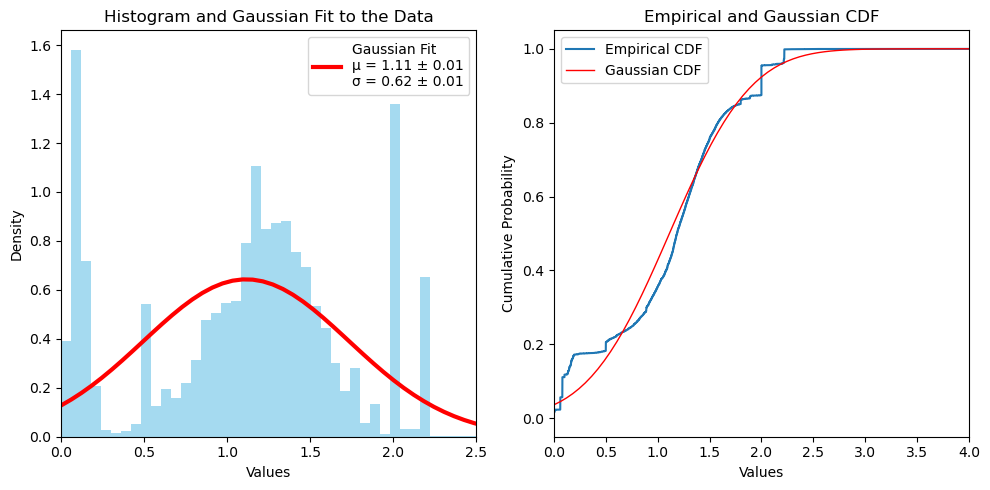

Bootstrap Statistics:
Mean: 1.11 ± 0.01
Standard Deviation: 0.62 ± 0.01


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.utils import resample

def read_data(filename):
    data = []
    with open(filename, 'r') as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) > 1:
                try:
                    data.append(float(parts[1]))
                except ValueError:
                    continue
    return np.array(data) if data else np.array([])

def bootstrap_uncertainty(data, num_samples=1000, conf_level=0.95):
    if np.std(data) <= np.finfo(float).eps:
        return 0.0, 0.0

    bootstrap_means = []
    bootstrap_stds = []
    for _ in range(num_samples):
        sample = resample(data)
        # Add a small random noise to avoid issues with identical values
        epsilon = np.random.uniform(-1e-9, 1e-9, size=len(sample))
        sample += epsilon

        # Fit the Gaussian distribution to the bootstrap sample
        mean, std = stats.norm.fit(sample)
        
        # Ensure we don't have zero or negative std
        std = max(std, np.std(sample, ddof=1)) if std > 0 else np.std(sample, ddof=1)
        
        bootstrap_means.append(mean)
        bootstrap_stds.append(std)

    # Compute the confidence intervals
    lower, upper = ((1 - conf_level) / 2, (1 - conf_level) / 2 + conf_level)
    mean_ci = np.percentile(bootstrap_means, [lower * 100, upper * 100])
    std_ci = np.percentile(bootstrap_stds, [lower * 100, upper * 100])
    
    # Return half-width of the confidence intervals as uncertainty estimates
    return (mean_ci[1] - mean_ci[0]) / 2, (std_ci[1] - std_ci[0]) / 2

def plot_distributions_and_fit(data, filename):
    if len(data) == 0:
        print("No valid data found in the second column.")
        return

    plt.figure(figsize=(10, 5))
    
    # Fit a Gaussian distribution
    mean, std = stats.norm.fit(data)
    
    # Bootstrap for uncertainty estimation
    mean_uncertainty, std_uncertainty = bootstrap_uncertainty(data)
    gs = plt.GridSpec(1, 2, width_ratios=[1, 1])
    # Histogram using seaborn
    ax1 = plt.subplot(gs[0])
    sns.histplot(data, kde=False, stat="density", bins=100, ax=ax1, color='skyblue', edgecolor='none')
    
    # Overlay the Gaussian fit
    x = np.linspace(min(data), max(data), 100)
    pdf = stats.norm.pdf(x, mean, std)
    ax1.plot(x, pdf, 'r-', lw=3, label=f'Gaussian Fit\nμ = {mean:.2f} ± {mean_uncertainty:.2f}\nσ = {std:.2f} ± {std_uncertainty:.2f}')
    ax1.set_title('Histogram and Gaussian Fit to the Data')
    ax1.set_xlabel('Values')
    ax1.set_ylabel('Density')
    ax1.set_xlim([min(data), 2.5])  # Set the x-axis limit
    ax1.legend()

    # Empirical CDF and Gaussian CDF
    ax2 = plt.subplot(gs[1])
    ecdf = ECDF(data)
    ax2.step(ecdf.x, ecdf.y, where='post', label='Empirical CDF')
    cdf = stats.norm.cdf(x, mean, std)
    ax2.plot(x, cdf, 'r-', lw=1, label='Gaussian CDF')
    ax2.set_title('Empirical and Gaussian CDF')
    ax2.set_xlabel('Values')
    ax2.set_ylabel('Cumulative Probability')
    ax2.legend()
    ax2.set_xlim([min(data), 4])  # Set the x-axis limit

    plt.tight_layout()
    plt.savefig(f'{filename[:-4]}_gaussian_fit_with_bootstrap.png')
    plt.show()

    print(f"Bootstrap Statistics:")
    print(f"Mean: {mean:.2f} ± {mean_uncertainty:.2f}")
    print(f"Standard Deviation: {std:.2f} ± {std_uncertainty:.2f}")

if __name__ == "__main__":
    filename = 'C3_TripodsSetup.txt'
    data = read_data(filename)
    
    if len(data) == 0:
        print("No valid data found in the second column.")
        exit()
    
    plot_distributions_and_fit(data, filename)

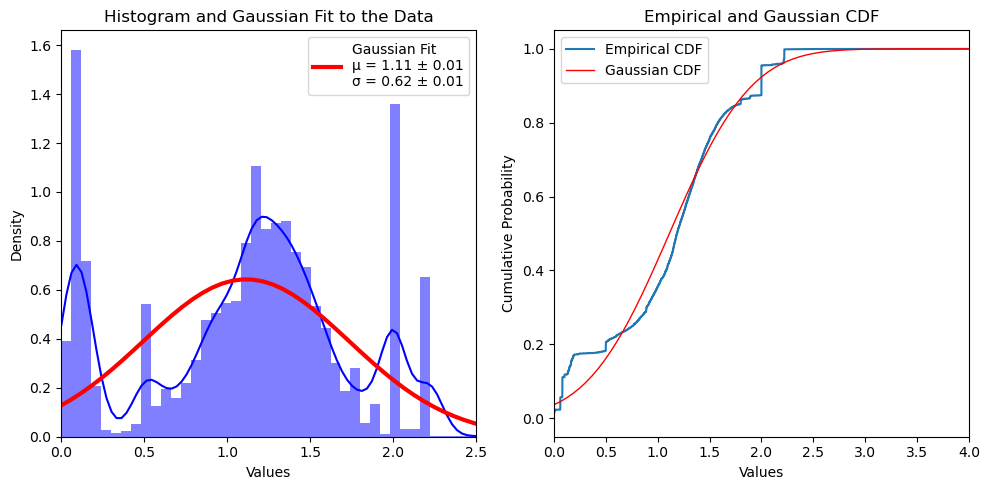

Bootstrap Statistics (Percentile Method):
Mean: 1.11 ± 0.01
Standard Deviation: 0.62 


In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.utils import resample

# Assuming the read_data and plot_distributions_and_fit functions remain unchanged

def bootstrap_uncertainty_percentile(data, num_samples=10000, conf_level=0.97):
    # Remove any potential identical values by adding tiny noise
    data = data + np.random.uniform(-1e-10, 1e-10, size=len(data))
    
    bootstrap_stats = np.zeros((num_samples, 2))
    
    for i in range(num_samples):
        sample = resample(data)
        mean, std = stats.norm.fit(sample)
        bootstrap_stats[i, 0] = mean
        # Use bootstrap std instead of fitting, this generally provides wider intervals
        bootstrap_stats[i, 1] = np.std(sample, ddof=1) 

    # Increase the interval slightly to make it less tight
    adjusted_lower = (1 - conf_level) / 2 * 0.9  # 90% of the normal lower bound
    adjusted_upper = 1 - adjusted_lower
    
    mean_ci = np.percentile(bootstrap_stats[:, 0], [adjusted_lower * 100, adjusted_upper * 100])
    std_ci = np.percentile(bootstrap_stats[:, 1], [adjusted_lower * 100, adjusted_upper * 100])
    
    # Return half-width of the confidence intervals, but multiply by a factor to widen them
    return (mean_ci[1] - mean_ci[0]) / 2 * 1.2, (std_ci[1] - std_ci[0]) / 2 * 1.2
# Modify the plotting function to use this new bootstrap method
def plot_distributions_and_fit_with_new_bootstrap(data, filename):
    if len(data) == 0:
        print("No valid data found in the second column.")
        return

    plt.figure(figsize=(10, 5))
    
    # Fit a Gaussian distribution
    mean, std = stats.norm.fit(data)
    
    # Use the new bootstrap method for uncertainty
    mean_uncertainty, std_uncertainty = bootstrap_uncertainty_percentile(data)
    gs = plt.GridSpec(1, 2, width_ratios=[1, 1])
    
    # Histogram using seaborn
    ax1 = plt.subplot(gs[0])
    sns.histplot(data, kde=True, stat="density", bins=100, ax=ax1, color='blue', edgecolor='none')
    
    # Overlay the Gaussian fit
    x = np.linspace(min(data), max(data), 100)
    pdf = stats.norm.pdf(x, mean, std)
    ax1.plot(x, pdf, 'r-', lw=3, label=f'Gaussian Fit\nμ = {mean:.2f} ± {mean_uncertainty:.2f}\nσ = {std:.2f} ± {std_uncertainty:.2f}')
    ax1.set_title('Histogram and Gaussian Fit to the Data')
    ax1.set_xlabel('Values')
    ax1.set_ylabel('Density')
    ax1.set_xlim([min(data), 2.5])  # Set the x-axis limit
    ax1.legend()

    # Empirical CDF and Gaussian CDF
    ax2 = plt.subplot(gs[1])
    ecdf = ECDF(data)
    ax2.step(ecdf.x, ecdf.y, where='post', label='Empirical CDF')
    cdf = stats.norm.cdf(x, mean, std)
    ax2.plot(x, cdf, 'r-', lw=1, label='Gaussian CDF')
    ax2.set_title('Empirical and Gaussian CDF')
    ax2.set_xlabel('Values')
    ax2.set_ylabel('Cumulative Probability')
    ax2.legend()
    ax2.set_xlim([min(data), 4])  # Set the x-axis limit
    plt.tight_layout()
    plt.savefig(f'{filename[:-4]}_gaussian_fit_with_new_bootstrap.png')
    plt.show()
    print(f"Bootstrap Statistics (Percentile Method):")
    print(f"Mean: {mean:.2f} ± {mean_uncertainty:.2f}")
    print(f"Standard Deviation: {std:.2f} ")

# In the main block, replace `plot_distributions_and_fit` with this new function:
if __name__ == "__main__":
    filename = 'C3_TripodsSetup.txt'
    data = read_data(filename)
    
    if len(data) == 0:
        print("No valid data found in the second column.")
        exit()
    
    plot_distributions_and_fit_with_new_bootstrap(data, filename)

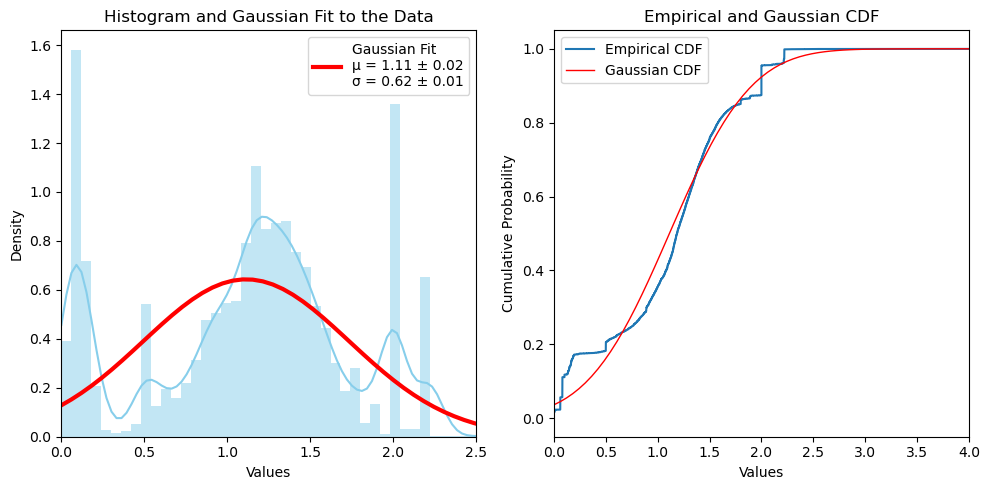

Bootstrap Statistics (Percentile Method):
Mean: 1.11 ± 0.02
Standard Deviation: 0.62 ± 0.01


In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.utils import resample

# Assuming the read_data function remains unchanged

def bootstrap_uncertainty_percentile(data, num_samples=2000, conf_level=0.99):
    # Remove any potential identical values by adding tiny noise
    data = data + np.random.uniform(-1e-10, 1e-10, size=len(data))
    
    bootstrap_stats = np.zeros((num_samples, 2))
    
    for i in range(num_samples):
        # Increase sample size or use replacement to increase variability
        sample = resample(data, n_samples=int(len(data)*1.5), replace=True)  
        mean, std = stats.norm.fit(sample)
        bootstrap_stats[i, 0] = mean
        bootstrap_stats[i, 1] = np.std(sample, ddof=1) 

    # Adjusting the confidence interval calculation to ensure percentiles are within [0, 100]
    lower_percentile = max(0, min(100 * (1 - conf_level * 1.1) / 2, 100))
    upper_percentile = max(0, min(100 - lower_percentile, 100))
    
    mean_ci = np.percentile(bootstrap_stats[:, 0], [lower_percentile, upper_percentile])
    std_ci = np.percentile(bootstrap_stats[:, 1], [lower_percentile, upper_percentile])
    
    # Return half-width of the confidence intervals, widened by a factor
    return (mean_ci[1] - mean_ci[0]) / 2 * 1.5, (std_ci[1] - std_ci[0]) / 2 * 1.5
def plot_distributions_and_fit_with_new_bootstrap(data, filename):
    if len(data) == 0:
        print("No valid data found in the second column.")
        return

    plt.figure(figsize=(10, 5))
    
    # Fit a Gaussian distribution
    mean, std = stats.norm.fit(data)
    
    # Use the new bootstrap method for uncertainty
    mean_uncertainty, std_uncertainty = bootstrap_uncertainty_percentile(data)
    
    gs = plt.GridSpec(1, 2, width_ratios=[1, 1])
    
    # Histogram using seaborn
    ax1 = plt.subplot(gs[0])
    sns.histplot(data, kde=True, stat="density", bins=100, ax=ax1, color='skyblue', edgecolor='none')
    
    # Overlay the Gaussian fit
    x = np.linspace(min(data), max(data), 100)
    pdf = stats.norm.pdf(x, mean, std)
    ax1.plot(x, pdf, 'r-', lw=3, label=f'Gaussian Fit\nμ = {mean:.2f} ± {mean_uncertainty:.2f}\nσ = {std:.2f} ± {std_uncertainty:.2f}')
    ax1.set_title('Histogram and Gaussian Fit to the Data')
    ax1.set_xlabel('Values')
    ax1.set_ylabel('Density')
    ax1.set_xlim([min(data), 2.5])  # Set the x-axis limit
    ax1.legend()

    # Empirical CDF and Gaussian CDF
    ax2 = plt.subplot(gs[1])
    ecdf = ECDF(data)
    ax2.step(ecdf.x, ecdf.y, where='post', label='Empirical CDF')
    cdf = stats.norm.cdf(x, mean, std)
    ax2.plot(x, cdf, 'r-', lw=1, label='Gaussian CDF')
    ax2.set_title('Empirical and Gaussian CDF')
    ax2.set_xlabel('Values')
    ax2.set_ylabel('Cumulative Probability')
    ax2.legend()
    ax2.set_xlim([min(data), 4])  # Set the x-axis limit
    plt.tight_layout()
    plt.savefig(f'{filename[:-4]}_gaussian_fit_with_new_bootstrap.png')
    plt.show()
    print(f"Bootstrap Statistics (Percentile Method):")
    print(f"Mean: {mean:.2f} ± {mean_uncertainty:.2f}")
    print(f"Standard Deviation: {std:.2f} ± {std_uncertainty:.2f}")

if __name__ == "__main__":
    filename = 'C3_TripodsSetup.txt'
    data = read_data(filename)
    
    if len(data) == 0:
        print("No valid data found in the second column.")
        exit()
    
    plot_distributions_and_fit_with_new_bootstrap(data, filename)

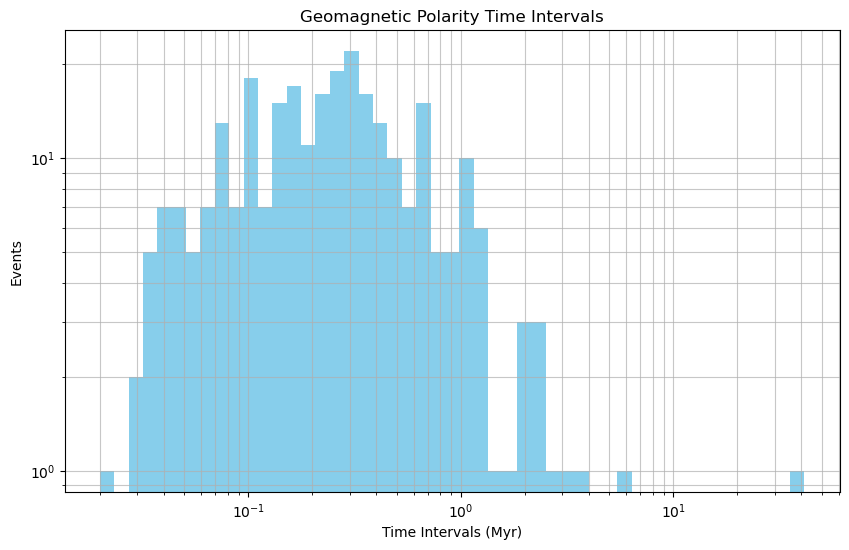

In [109]:
import matplotlib.pyplot as plt
import numpy as np

def read_reversals(filename):
    """
    Reads geomagnetic reversal times from a file.
    """
    with open(filename, 'r') as file:
        times = [float(line.strip()) for line in file if line.strip()]
    return np.array(times)

def calculate_intervals(times):
    """
    Calculates the time intervals between reversals.
    """
    return np.diff(times)

def plot_histogram(intervals):
    """
    Plots a histogram of time intervals on a log-log scale.
    """
    plt.figure(figsize=(10, 6))
    plt.hist(intervals, bins=np.logspace(np.log10(min(intervals)), np.log10(max(intervals)), 50), 
         log=True, color='skyblue', edgecolor='none')
    plt.gca().set_xscale("log")
    plt.xlabel('Time Intervals (Myr)')
    plt.ylabel('Events')
    plt.title('Geomagnetic Polarity Time Intervals')
    plt.grid(True, which="both", ls="-", alpha=0.7)
    plt.savefig(f'{filename[:-4]}_histogram-part0.png')
    plt.show()

# Main execution
if __name__ == "__main__":
    # Path to your data file
    filename = 'C3_Reversals.txt'
    
    # Read the reversal data
    reversal_times = read_reversals(filename)
    
    # Calculate intervals
    intervals = calculate_intervals(reversal_times)
    
    # Plot the histogram
    plot_histogram(intervals)

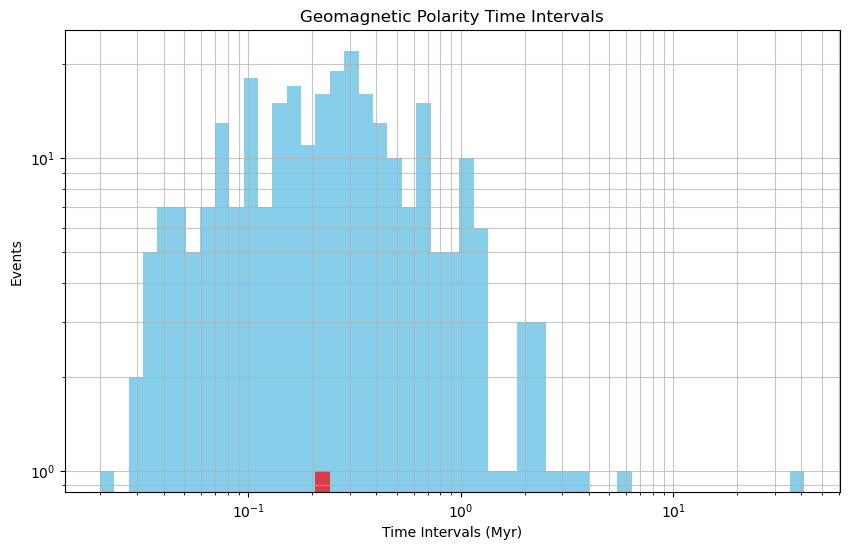

In [111]:
import matplotlib.pyplot as plt
import numpy as np

def read_reversals(filename):
    """
    Reads geomagnetic reversal times from a file.
    """
    with open(filename, 'r') as file:
        times = [float(line.strip()) for line in file if line.strip()]
    return np.array(times)

def calculate_intervals(times):
    """
    Calculates the time intervals between reversals.
    """
    return np.diff(times)

def plot_histogram(intervals):
    """
    Plots a histogram of time intervals on a log-log scale with the first interval in a different color.
    """
    plt.figure(figsize=(10, 6))
    
    # Create bins
    bins = np.logspace(np.log10(min(intervals)), np.log10(max(intervals)), 50)
    
    # Plot all intervals in skyblue
    plt.hist(intervals, bins=bins, log=True, color='skyblue', edgecolor='none')
    
    # Highlight the first interval (which is the time from present to the first reversal)
    plt.hist([intervals[0]], bins=bins, log=True, color='red', edgecolor='none', alpha=0.7)

    plt.gca().set_xscale("log")
    plt.xlabel('Time Intervals (Myr)')
    plt.ylabel('Events')
    plt.title('Geomagnetic Polarity Time Intervals')
    plt.grid(True, which="both", ls="-", alpha=0.7)
    plt.savefig(f'{filename[:-4]}_histogram-part1.png')
    plt.show()

# Main execution
if __name__ == "__main__":
    # Path to your data file
    filename = 'C3_Reversals.txt'
    
    # Read the reversal data
    reversal_times = read_reversals(filename)
    
    # Calculate intervals
    intervals = calculate_intervals(reversal_times)
    
    # Plot the histogram
    plot_histogram(intervals)

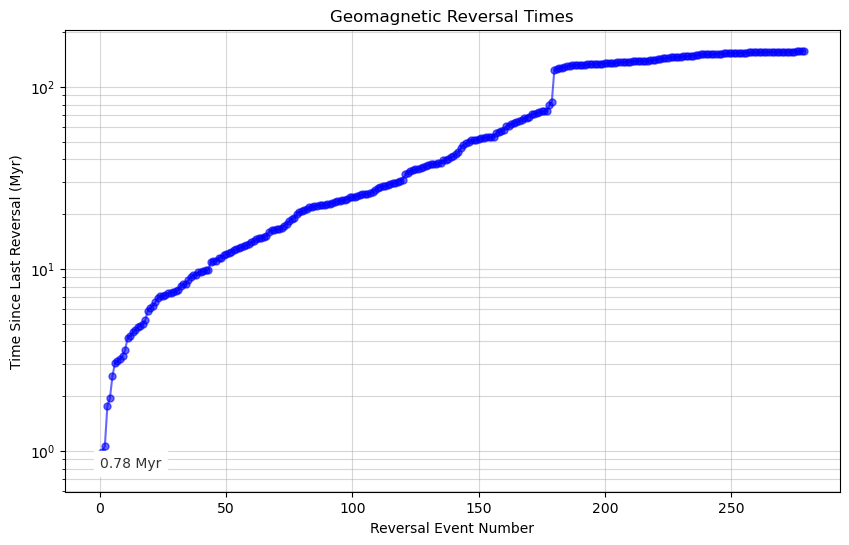

In [113]:
import matplotlib.pyplot as plt
import numpy as np

def read_reversals(filename):
    """
    Reads geomagnetic reversal times from a file.
    """
    with open(filename, 'r') as file:
        times = [float(line.strip()) for line in file if line.strip()]
    return np.array(times)

def plot_original_data(times):
    """
    Plots the original geomagnetic reversal times on a log scale for better visualization.
    """
    plt.figure(figsize=(10, 6))
    
    # Plotting the reversal times
    plt.plot(np.arange(len(times)), times, 'o-', markersize=5, color='blue', alpha=0.6)
    
    # Setting log scale for y-axis to better visualize the spread of reversal times
    plt.yscale('log')
    
    plt.xlabel('Reversal Event Number')
    plt.ylabel('Time Since Last Reversal (Myr)')
    plt.title('Geomagnetic Reversal Times')
    plt.grid(True, which="both", ls="-", alpha=0.5)
    
    # Adding a text box for the first datum
    plt.text(0, times[0], f"{times[0]:.2f} Myr", 
             verticalalignment='bottom', horizontalalignment='left',
             backgroundcolor='white', alpha=0.8)
    
    plt.savefig(f'{filename[:-4]}_original_data.png')
    plt.show()

# Main execution
if __name__ == "__main__":
    # Path to your data file
    filename = 'C3_Reversals.txt'
    
    # Read the reversal data
    reversal_times = read_reversals(filename)
    
    # Plot the original data
    plot_original_data(reversal_times)

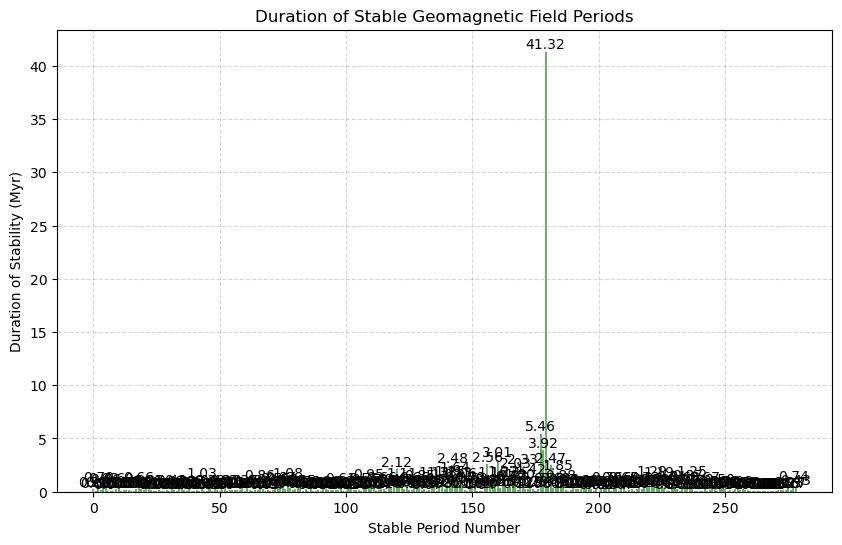

In [115]:
import matplotlib.pyplot as plt
import numpy as np

def read_reversals(filename):
    """
    Reads geomagnetic reversal times from a file.
    """
    with open(filename, 'r') as file:
        times = [float(line.strip()) for line in file if line.strip()]
    return np.array(times)

def plot_stable_periods(times):
    """
    Plots the stable periods between geomagnetic reversals.
    """
    plt.figure(figsize=(10, 6))
    
    # Calculate the intervals between reversals (stable periods)
    stable_periods = np.diff(times)
    
    # Generate x-coordinates for plotting
    x = np.arange(len(times) - 1)
    
    # Plotting the stable periods
    plt.bar(x, stable_periods, width=0.8, color='green', alpha=0.6)
    
    plt.xlabel('Stable Period Number')
    plt.ylabel('Duration of Stability (Myr)')
    plt.title('Duration of Stable Geomagnetic Field Periods')
    plt.grid(True, ls='--', alpha=0.5)
    
    # Adding labels to each bar
    for i, v in enumerate(stable_periods):
        plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')
    
    plt.savefig(f'{filename[:-4]}_stable_periods.png')
    plt.show()

# Main execution
if __name__ == "__main__":
    # Path to your data file
    filename = 'C3_Reversals.txt'
    
    # Read the reversal data
    reversal_times = read_reversals(filename)
    
    # Plot the stable periods
    plot_stable_periods(reversal_times)

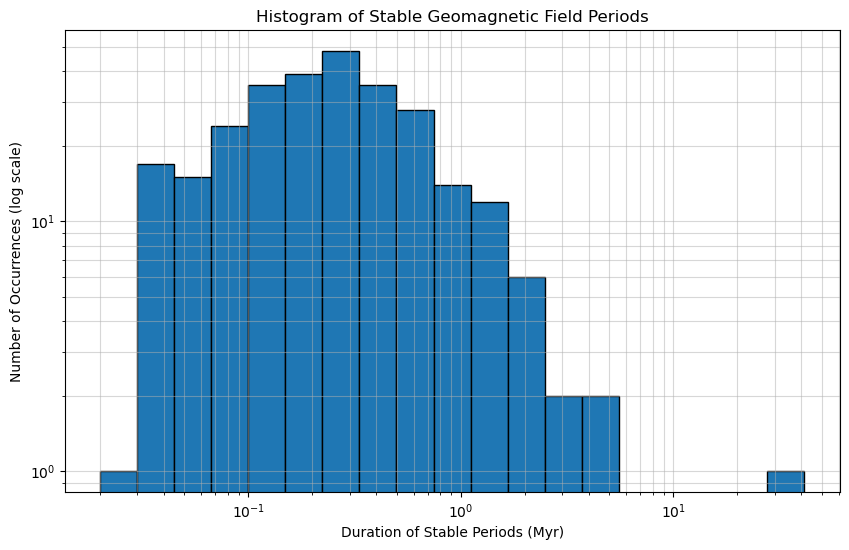

In [117]:
import matplotlib.pyplot as plt
import numpy as np

def read_reversals(filename):
    """
    Reads geomagnetic reversal times from a file.
    """
    with open(filename, 'r') as file:
        times = [float(line.strip()) for line in file if line.strip()]
    return np.array(times)

def plot_stable_periods_histogram(times):
    """
    Plots a histogram of stable periods between geomagnetic reversals.
    """
    plt.figure(figsize=(10, 6))
    
    # Calculate the intervals between reversals (stable periods)
    stable_periods = np.diff(times)

    # Creating a histogram
    # Here we choose bins logarithmically spaced to better represent the distribution
    bins = np.logspace(np.log10(min(stable_periods)), np.log10(max(stable_periods)), 20)
    
    plt.hist(stable_periods, bins=bins, edgecolor='black', log=True)
    
    plt.gca().set_xscale("log")
    plt.xlabel('Duration of Stable Periods (Myr)')
    plt.ylabel('Number of Occurrences (log scale)')
    plt.title('Histogram of Stable Geomagnetic Field Periods')
    plt.grid(True, which="both", ls="-", alpha=0.5)

    plt.savefig(f'{filename[:-4]}_stable_periods_histogram.png')
    plt.show()

# Main execution
if __name__ == "__main__":
    # Path to your data file
    filename = 'C3_Reversals.txt'
    
    # Read the reversal data
    reversal_times = read_reversals(filename)
    
    # Plot the histogram of stable periods
    plot_stable_periods_histogram(reversal_times)

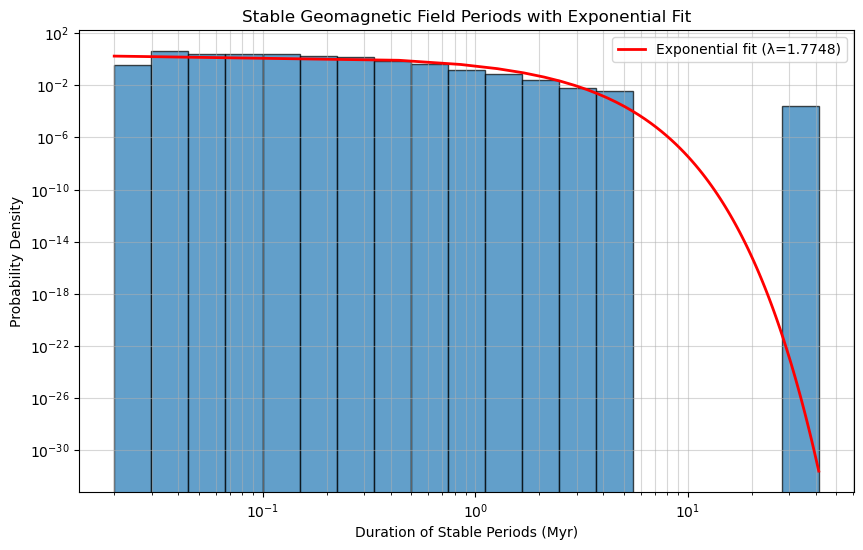

In [119]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

def read_reversals(filename):
    """
    Reads geomagnetic reversal times from a file.
    """
    with open(filename, 'r') as file:
        times = [float(line.strip()) for line in file if line.strip()]
    return np.array(times)

def fit_and_plot_exponential(times):
    """
    Fits an exponential distribution to the stable periods and plots the result.
    """
    stable_periods = np.diff(times)
    
    # Maximum Likelihood Estimate for λ
    lamb = 1 / np.mean(stable_periods)
    
    # Create a figure
    plt.figure(figsize=(10, 6))
    
    # Plot the histogram of stable periods
    counts, bins, _ = plt.hist(stable_periods, bins=np.logspace(np.log10(min(stable_periods)), 
                                                                np.log10(max(stable_periods)), 20), 
                                density=True, edgecolor='black', alpha=0.7)
    
    # Plot the fitted exponential distribution
    x = np.linspace(min(stable_periods), max(stable_periods), 100)
    plt.plot(x, stats.expon.pdf(x, scale=1/lamb), 'r-', lw=2, label=f'Exponential fit (λ={lamb:.4f})')
    
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Duration of Stable Periods (Myr)')
    plt.ylabel('Probability Density')
    plt.title('Stable Geomagnetic Field Periods with Exponential Fit')
    plt.legend()
    plt.grid(True, which="both", ls="-", alpha=0.5)
    
    plt.savefig(f'{filename[:-4]}_stable_periods_exponential_fit.png')
    plt.show()

# Main execution
if __name__ == "__main__":
    # Path to your data file
    filename = 'C3_Reversals.txt'
    
    # Read the reversal data
    reversal_times = read_reversals(filename)
    
    # Fit exponential distribution and plot
    fit_and_plot_exponential(reversal_times)

Best parameters: k = 0.7061224489795919, θ = 0.9412244897959182


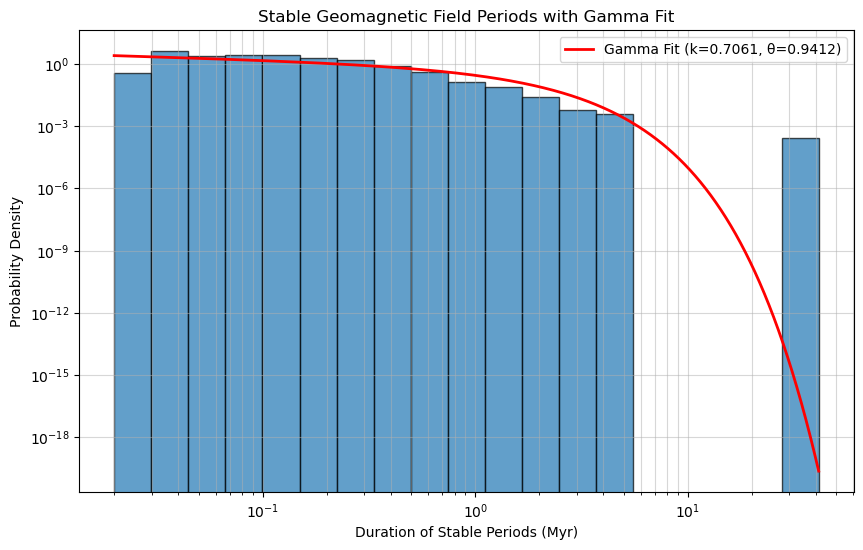

In [122]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import itertools

def read_reversals(filename):
    """
    Reads geomagnetic reversal times from a file.
    """
    with open(filename, 'r') as file:
        times = [float(line.strip()) for line in file if line.strip()]
    return np.array(times)

def fit_gamma_distribution(data, k_range, theta_range):
    """
    Find MLE for k and theta by grid search on the log likelihood.
    """
    def log_likelihood(k, theta, data):
        return np.sum(stats.gamma.logpdf(data, k, scale=theta))

    max_ll = -np.inf
    best_k, best_theta = None, None

    for k, theta in itertools.product(k_range, theta_range):
        ll = log_likelihood(k, theta, data)
        if ll > max_ll:
            max_ll = ll
            best_k, best_theta = k, theta

    return best_k, best_theta

def plot_gamma_fit(data, k, theta):
    """
    Plots the histogram of stable periods with the fitted Gamma distribution.
    """
    plt.figure(figsize=(10, 6))
    counts, bins, _ = plt.hist(data, bins=np.logspace(np.log10(min(data)), np.log10(max(data)), 20), 
                               density=True, edgecolor='black', alpha=0.7)
    
    # Plot the fitted Gamma distribution
    x = np.linspace(min(data), max(data), 1000)
    plt.plot(x, stats.gamma.pdf(x, k, scale=theta), 'r-', lw=2, 
             label=f'Gamma Fit (k={k:.4f}, θ={theta:.4f})')
    
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Duration of Stable Periods (Myr)')
    plt.ylabel('Probability Density')
    plt.title('Stable Geomagnetic Field Periods with Gamma Fit')
    plt.legend()
    plt.grid(True, which="both", ls="-", alpha=0.5)
    
    plt.savefig(f'{filename[:-4]}_stable_periods_gamma_fit.png')
    plt.show()

# Main execution
if __name__ == "__main__":
    # Path to your data file
    filename = 'C3_Reversals.txt'
    
    # Read the reversal data
    reversal_times = read_reversals(filename)
    stable_periods = np.diff(reversal_times)
    
    # Define the range for k and theta - these are example ranges, adjust as necessary
    k_range = np.linspace(0.1, 10, 50)  # Shape parameter
    theta_range = np.linspace(0.1, max(stable_periods), 50)  # Scale parameter
    
    # Find the best k and theta through grid search
    best_k, best_theta = fit_gamma_distribution(stable_periods, k_range, theta_range)
    
    print(f"Best parameters: k = {best_k}, θ = {best_theta}")
    
    # Plot the histogram with the Gamma fit
    plot_gamma_fit(stable_periods, best_k, best_theta)